In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


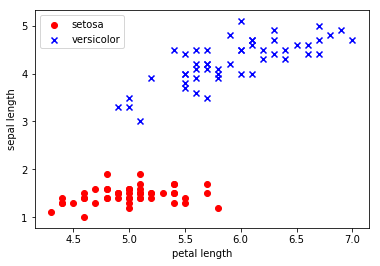

In [3]:
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)
X = df.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0],X[:50,1], color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='blue',marker='x',label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [12]:
from perceptron.perceptron import myperceptron

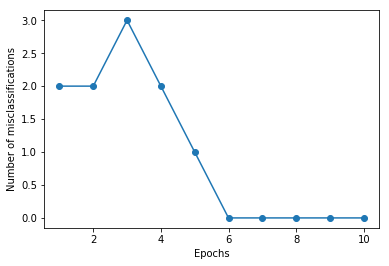

In [16]:
ppn = myperceptron(eta=1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

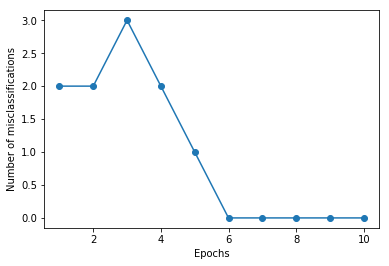

In [17]:
ppn = myperceptron(eta=1000, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## 上面的图像分别设置了不同的学习率，同时通过第一张散点图看，数据集是线性可分的，不同的学习率对收敛速度以及模型性能并没有影响。

In [4]:
from Adaline.adalineGD import AdalineGD

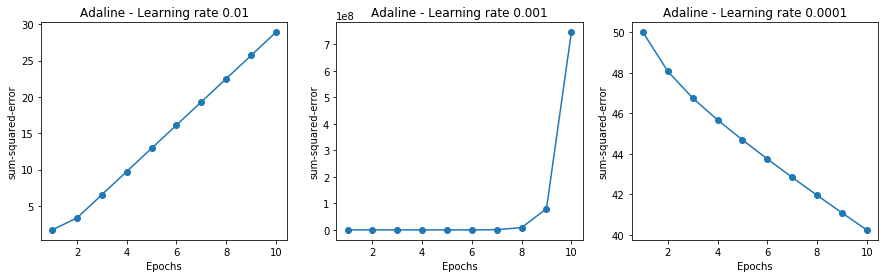

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

#学习速率太大，直接跳过最优点，无法收敛
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('sum-squared-error')
ax[0].set_title('Adaline - Learning rate 0.01')

#收敛速度完美，只需要迭代1次就搞定
ada2 = AdalineGD(n_iter=10, eta=0.001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_,marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.001')

#收敛速度太慢
ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[2].plot(range(1, len(ada3.cost_)+1), ada3.cost_,marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('sum-squared-error')
ax[2].set_title('Adaline - Learning rate 0.0001')

In [10]:
#通过对特征进行标准化处理，来提升算法的收敛性能
X_std = np.copy(X)
#分别对样本的两个特征进行标准化缩放
X_std[:,0] = (X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1]-X[:,1].mean())/X[:,1].std()

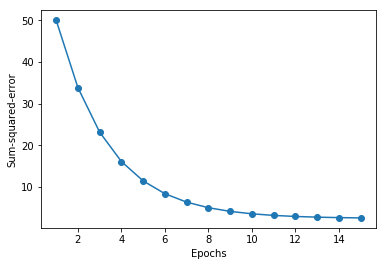

In [13]:
ada = AdalineGD(eta=0.01,n_iter=15)
ada.fit(X_std, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

结论:通过比较对特征进行标准化缩放之后和之间的图像，可以发现缩放后，即使学习速率很大，依然是逐步收敛的

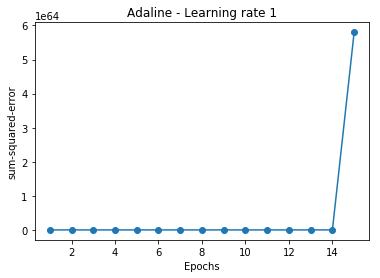

In [20]:
#使用不同的学习速率
ada3 = AdalineGD(n_iter=15, eta=1).fit(X_std, y)
plt.plot(range(1, len(ada3.cost_)+1), ada3.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('sum-squared-error')
plt.title('Adaline - Learning rate 1')

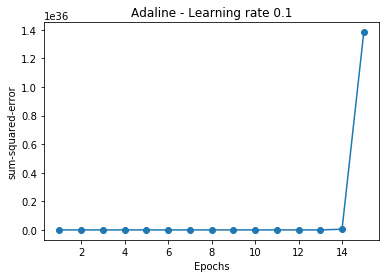

In [21]:
#使用不同的学习速率
ada3 = AdalineGD(n_iter=15, eta=0.1).fit(X_std, y)
plt.plot(range(1, len(ada3.cost_)+1), ada3.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('sum-squared-error')
plt.title('Adaline - Learning rate 0.1')

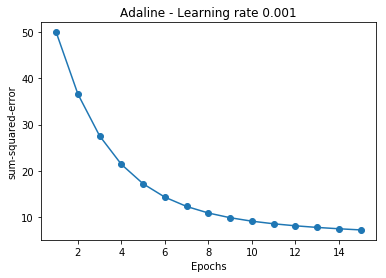

In [22]:
#使用不同的学习速率
ada3 = AdalineGD(n_iter=15, eta=0.001).fit(X_std, y)
plt.plot(range(1, len(ada3.cost_)+1), ada3.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('sum-squared-error')
plt.title('Adaline - Learning rate 0.001')

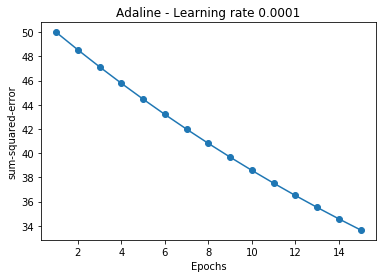

In [23]:
#使用不同的学习速率
ada3 = AdalineGD(n_iter=15, eta=0.0001).fit(X_std, y)
plt.plot(range(1, len(ada3.cost_)+1), ada3.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')

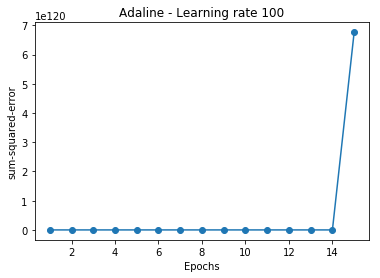

In [24]:
#使用不同的学习速率
ada3 = AdalineGD(n_iter=15, eta=100).fit(X_std, y)
plt.plot(range(1, len(ada3.cost_)+1), ada3.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('sum-squared-error')
plt.title('Adaline - Learning rate 100')

### 结论：对特征进行缩放之后，速率越大，收敛越快，而且不会错过最优点。为什么？？

In [25]:
from Adaline.adalineSGD import AdalineSGD

In [26]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

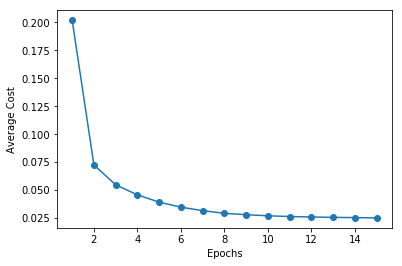

In [27]:
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

### 可以看到随机下降算法的收敛速度比梯度下降法的更快

## 使用sklearn中的感知器来进行多分类学习

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [3]:
#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
#对训练集和测试集的特征进行缩放
sc = StandardScaler()
sc.fit(X_train) #学习参数，也就是计算出样本均值和标准差fit
X_train_std = sc.transform(X_train) #使用前面计算得到的均值和标准差进行处理transform
X_test_std = sc.transform(X_test)

In [5]:
#使用感知器进行多分类建模
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0) #设置迭代次数和学习速率
ppn.fit(X_train_std, y_train) #开始学习参数

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [6]:
#使用学习到的模型进行预测
y_pred = ppn.predict(X_test_std)

In [7]:
#使用误分类数来评估模型性能
print('误分类样本总数为: %d' % (y_test != y_pred).sum())
#使用(1-误分类率)=正确率来评估模型性能
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

误分类样本总数为: 4
Accuracy: 0.91
